In [19]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [20]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


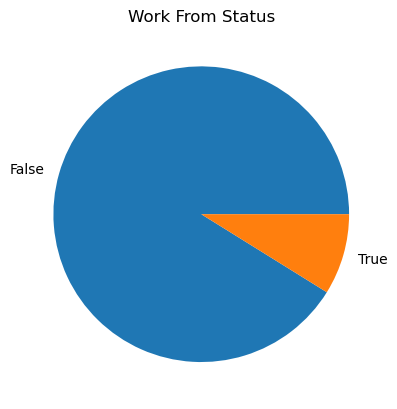

In [21]:
df['job_work_from_home'].value_counts().plot(kind='pie') # used this since it as bool and would be easy to make a pie chart of it.
plt.ylabel("")
plt.title('Work From Status')
plt.show()

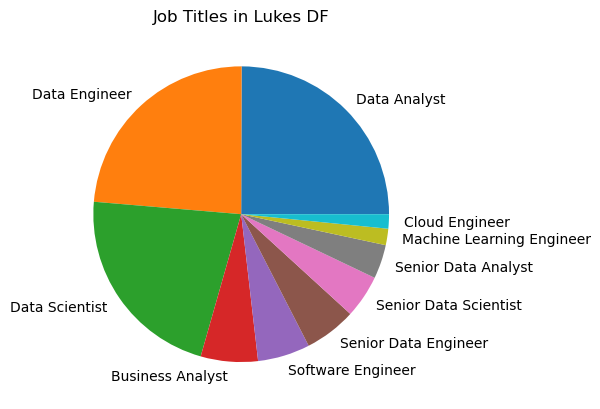

In [22]:
df['job_title_short'].value_counts().plot(kind='pie') # used this since it as bool and would be easy to make a pie chart of it.
plt.ylabel("")
plt.title('Job Titles in Lukes DF')
plt.show()

# this makes it much harder to understand cause we don't know the what each section define, hence it always recomended to use this pie chart when there are 2-3 values only.

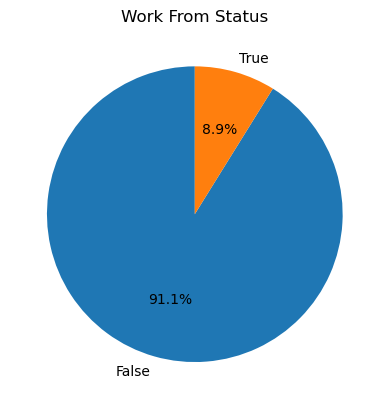

In [23]:
# lets orient the job_wfh pie chart for angles and all.

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%') 
# startangle will reset the start where we distribute True bool value and autopct or 
# auto percentage has - % which is to specify we are formating the text from here, 
# 1 is the minimum width of number like ones and tens of the numeric system, 
# .1 gives us only one decimal place value, e.g. for 2 we just need to put .2 and 
# f specifies this is floating point number.
# %% symbol at the last specifies we need to see it in percentange value, basically a print version of %
plt.ylabel("")
plt.title('Work From Status')
plt.show()

In [24]:
# for three diff cols having values in bool we can use pie plots, for given data.

df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


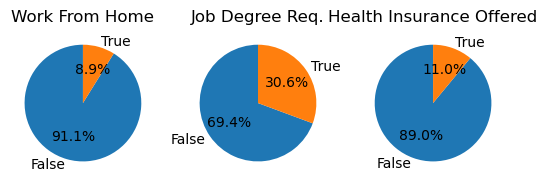

In [32]:
fig, ax = plt.subplots(1, 3)

# making a dict which we can use in a loop since we don't wanna go and write the below again and again.

dict_column = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):  # we are running a loop in the items provided in the dict. 
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True']) # labels to show what each section means.
    ax[i].set_title(title)

plt.show()